Author: Marco Pellegrino\
Year: 2024

With this notebook, one specific page time series is analyzed.

In [1]:
from pathlib import Path
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Prepare data

In [2]:
df = pd.read_csv('../data/raw/train_1.csv', index_col=None)
df.columns = map(str.lower, df.columns) # make column names lowercase

Select page

In [7]:
page_name = '2NE1_zh.wikipedia.org_all-access_spider'
time_serie = df[df['page'] == page_name]

In [15]:
# Regular expression to match date format "YYYY-MM-DD"
date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')

# Filter columns based on the regular expression
filtered_columns = [col for col in df.columns if date_pattern.match(col)]

# Create a new DataFrame with only the filtered columns
time_serie = time_serie[filtered_columns]

In [16]:
# Creating a DataFrame for test dates and predicted values
data = pd.DataFrame({
    'date': pd.to_datetime(time_serie.columns.values),
    'traffic_demand': time_serie.values.flatten(),
})
data.set_index('date', inplace=True) # set date as index

# Inspect Data

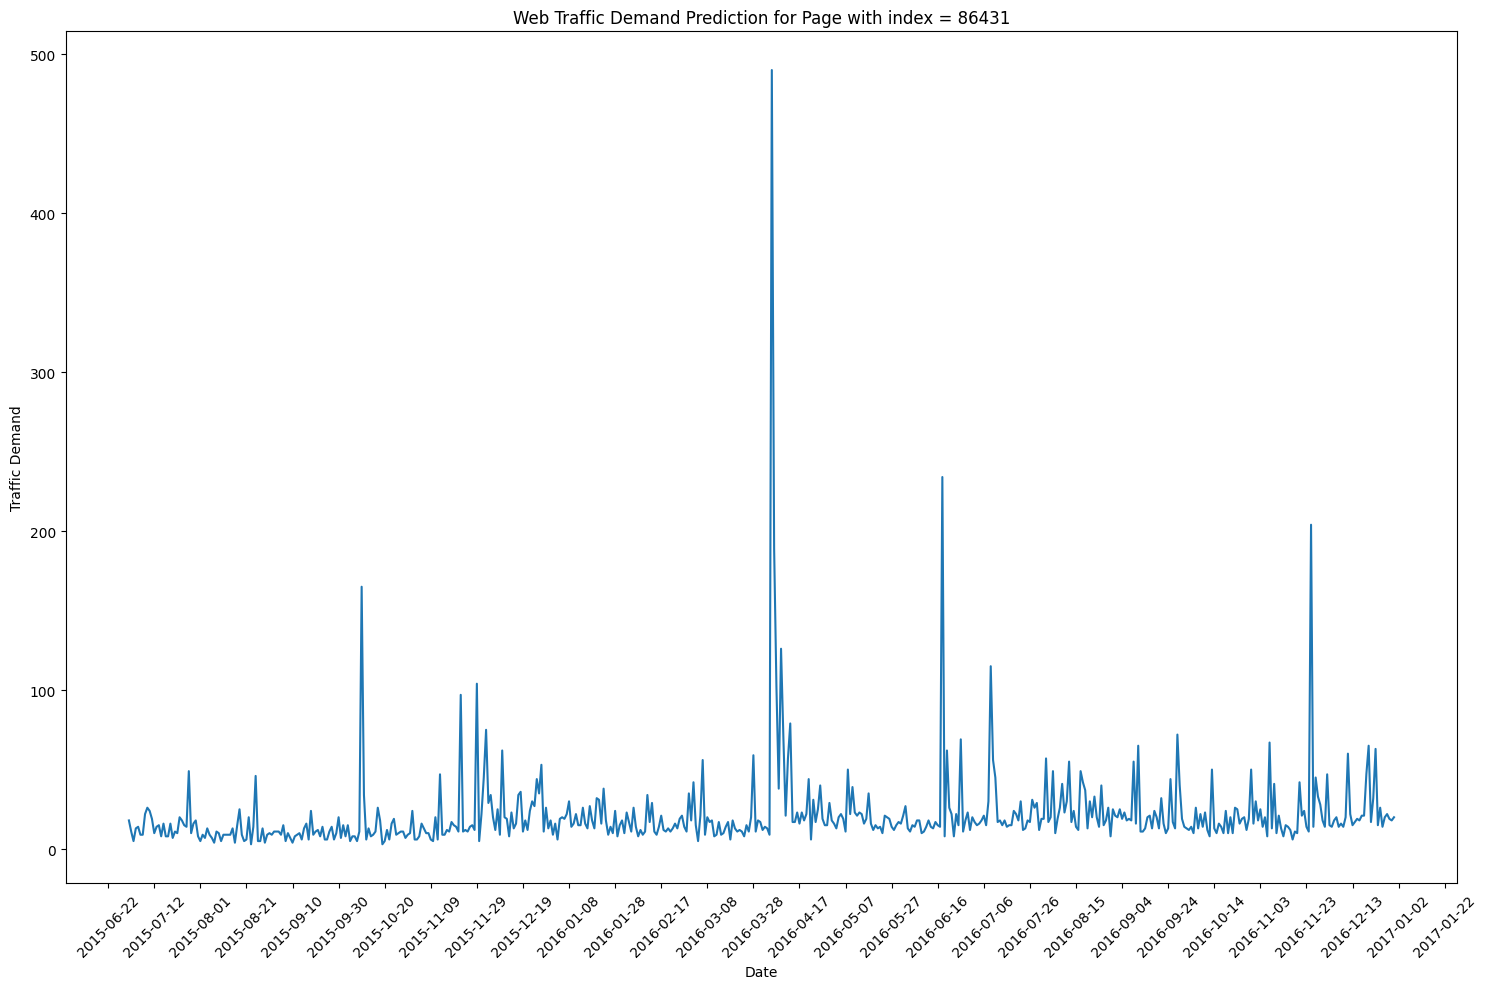

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(data.index, data['traffic_demand'])
plt.title(f'Web Traffic Demand Prediction for Page with index = {page_index}')
plt.xlabel('Date')
plt.ylabel('Traffic Demand')

# Set major ticks to be every 2 days
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

# Rotate and format the date labels
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Stationarity Test

In [18]:
adf_test = adfuller(data['traffic_demand'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -8.884038
p-value: 0.000000


A p-value below 0.05 indicates stationarity

# Autocorrelation

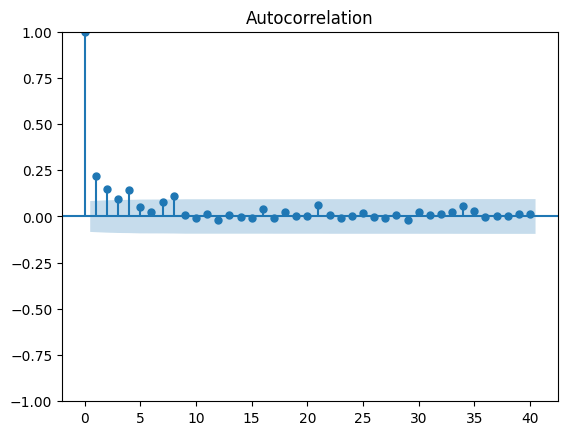

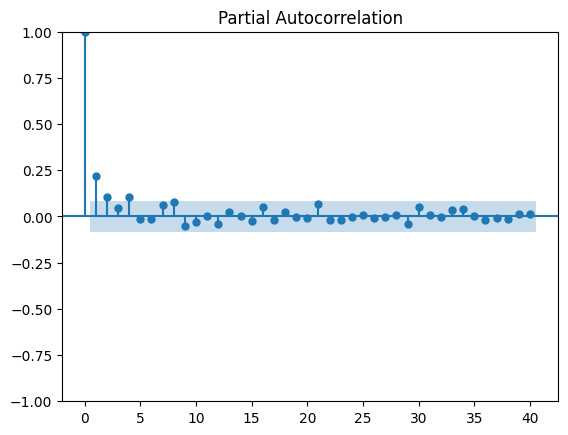

In [19]:
plot_acf(data['traffic_demand'], lags=40)
plot_pacf(data['traffic_demand'], lags=40)
plt.show()

The time series has weekly seasonal trends:
- Spikes every 7 lags/days (both plots)
- Positive and negative correlations (second plot)